In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 1. Basic information

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
train_df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.shape

(891, 12)

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
print("Unique Values:")
for col in train_df.columns:
    print(f"{col} : {train_df[col].nunique()}")
    print(" ")

Unique Values:
PassengerId : 891
 
Survived : 2
 
Pclass : 3
 
Name : 891
 
Sex : 2
 
Age : 88
 
SibSp : 7
 
Parch : 7
 
Ticket : 681
 
Fare : 248
 
Cabin : 147
 
Embarked : 3
 


Note: ML models work best with numbers, not with text, so we try to convert most of the object data type columns to integer data type columns, we often use Label Encoding for that, LE is used when there is low cardinality (low number of unique values, like Sex have only 2 unique values) & when the data is ordinal (when data has rankings, like low, medium, high). We will do this after we have dealt with null values.

# 2. Dealing with null values

## i) Removing null values

In [8]:
# 1st method: Drop rows with null values
dropRows_df = train_df.dropna()
dropRows_df.shape

(183, 12)

A huge amount of rows, 891-183=708 rows, have been dropped. Which is a insane amount of data loss, so this method isn't effective for dealing with null values.

In [9]:
#2nd method: Drop cols with null values
dropCols_df = train_df.dropna(axis=1)
dropCols_df.shape

(891, 9)

3 columns have been dropped, "Age", "Cabin" & "Embarked", "Age" is an important column to us, because there is a probability that younger kids & old people were rescued first, so it plays an important role in prediction of "Survived". "Cabin" has 687 null values, means most of the column is empty, so it can be dropped. "Embarked" has only 2 null values, so it can't be dropped.

In [10]:
#3rd method: Drop rows with null values in specific columns
dropAgeRows_df = train_df.dropna(subset=["Age"])
dropAgeRows_df.shape

(714, 12)

"Age" column has 891-714=177 rows which have null values, which is a lot but can be dropped, if there is a need.

## ii) Filling null values 

In [11]:
#1st method: Fill with a specific value
nullFill_df = train_df.fillna(value=0)
nullFill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We filled every null value with a value of 0.

In [12]:
#2nd method: Fill with forward fill
ffill_df = train_df.ffill()
ffill_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,C50,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.45,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,C148,Q


Every null value is filled with last valid observation. For ex.: In "train_df" at (888, "Age") there was a null value, but in "ffill_df" its filled with the value of (887, "Age").

In [13]:
#3rd method: Fill with backward fill
bfill_df = train_df.bfill()
bfill_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,B42,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.0,1,2,W./C. 6607,23.45,C148,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Every null value is filled with next valid observation. For ex.: In "train_df" there was a null value at (888, "Age") which is now filled with the value of (889, "Age").

In [14]:
#4th method: Fill with linear interpolation
interpolate_df = train_df.interpolate()
interpolate_df.tail()

/tmp/ipykernel_33/350281781.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolate_df = train_df.interpolate()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.5,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Linear interpolation fills the null values on the basis of surrounding values. The null value at (888, "Age") in "train_df" is filled with the average value of (887, "Age") & (889, "Age"). There are other types of interpolations too, like polynomial (method="polynomial", order=2) & spline interpolation (method="spline", order=3).

## iii) Replacing null values

In [15]:
# 1st method: Replacing null values with the column's mean
# Let's find out mean of "Age" column
train_df["Age"].mean()

29.69911764705882

So, when we replace null values in "Age" with mean of "Age", the null values should be filled with value of "29.69911764705882".

In [16]:
nullMean_df = train_df["Age"].replace(np.nan, train_df["Age"].mean())
nullMean_df.tail()

886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, dtype: float64

It worked. We also have null values in "Cabin" but its a object type column, whose mean can't be calculated. So replacing null values of "Cabin" with mean of "Cabin" doesn't make sense.

In [17]:
# df1 = train_df["Cabin"].replace(np.nan, train_df["Cabin"].mean())
# df1.info()

# TypeError: unsupported operand type(s) for +: 'int' and 'str'

There are 2 ways by which we can handle null values of object data type column. Let's see them:

In [18]:
#2nd method: Replacing null values with placeholder for object data type column(s)
objNullHold_df = train_df["Cabin"].fillna("Unknown")
objNullHold_df.head()

0    Unknown
1        C85
2    Unknown
3       C123
4    Unknown
Name: Cabin, dtype: object

As you can see, null values are filled with "Unknown".

In [19]:
#3rd method: Use mode (most frequent value)
Cabin_mode = train_df["Cabin"].mode()[0] # There can be multiple modes too, [0] gives us 1st mode value.
objNullMode_df = train_df["Cabin"].fillna(Cabin_mode)
objNullMode_df.head()

0    B96 B98
1        C85
2    B96 B98
3       C123
4    B96 B98
Name: Cabin, dtype: object

As you can see, all null values of "Cabin" are filled with mode of "Cabin" which is "B96 B98".

There are other ways of handling object data type null values too, like Label Encoding & OHE, we will see them later.

In [20]:
#4th method: Using Conditional logic
applyNullFill_df = train_df["Cabin"].apply(lambda x: "Unknown" if pd.isnull(x) else x)
applyNullFill_df

0      Unknown
1          C85
2      Unknown
3         C123
4      Unknown
        ...   
886    Unknown
887        B42
888    Unknown
889       C148
890    Unknown
Name: Cabin, Length: 891, dtype: object

We have gone through 11 methods of dealing with null values, except Label Encoding & OHE. Also, note that our original dataset "train_df" still has Nan values because we never changed it, we only made copies of change.

So, lets change it now, so we can move forward with our project.

In [21]:
# Drop all rows with null values in "Age"
train_df = train_df.dropna(subset=["Age"])

In [22]:
# Replaced Nan values in "Cabin" with mode of "Cabin"
train_df["Cabin"] = train_df["Cabin"].fillna(train_df["Cabin"].mode()[0])

In [23]:
# Replaced Nan values in "Embarked" with mode of "Embarked"
train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])

In [24]:
# "Name" & "PassengerId" columns won't help us in predicting who survived or not, so we can drop it.
train_df = train_df.drop(columns=["Name", "PassengerId"])

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Ticket    714 non-null    object 
 7   Fare      714 non-null    float64
 8   Cabin     714 non-null    object 
 9   Embarked  714 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.4+ KB


Now our dataset is devoid from any null values & ready to be visualized.

# 3. Dealing with Outliers

## i) Finding Outliers

Looking at the columns, we can conclude that only "Age" & "Fare" can have outliers because some are object data type columns & some have very less amount of unique values.

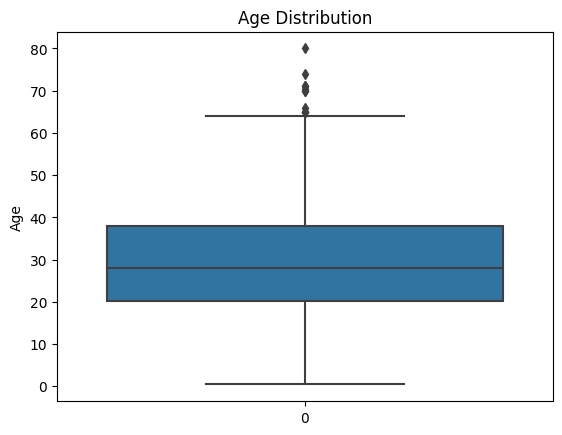

In [26]:
# 1st method: Boxplots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(data=train_df["Age"])
plt.title("Age Distribution")
plt.ylabel("Age")
plt.show()

Points which are marked outside whiskers are to be considered as outliers. Approximation: Values greater than 60 are potential outliers in "Age".

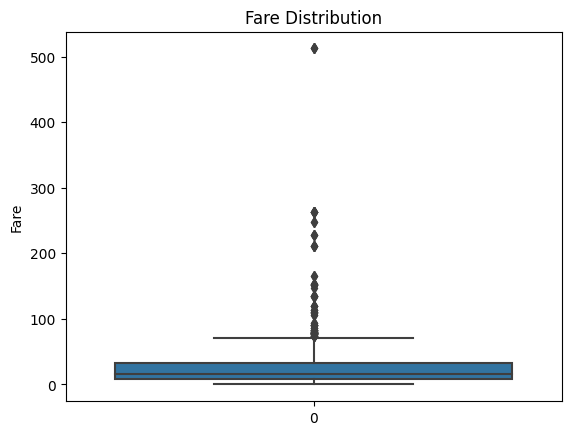

In [27]:
sns.boxplot(data=train_df["Fare"])
plt.title("Fare Distribution")
plt.ylabel("Fare")
plt.show()

Approximation: Fare above 80 are potential outliers.

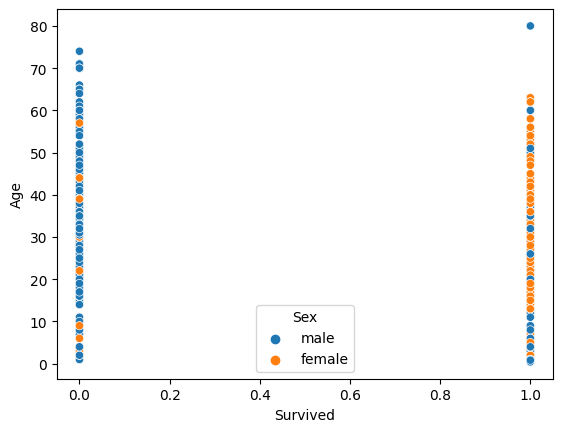

In [28]:
#2nd method: Scatter Plots
sns.scatterplot(x="Survived", y="Age", data=train_df, hue="Sex")
plt.show()

Not much to derive, but we can see females survived more than males.

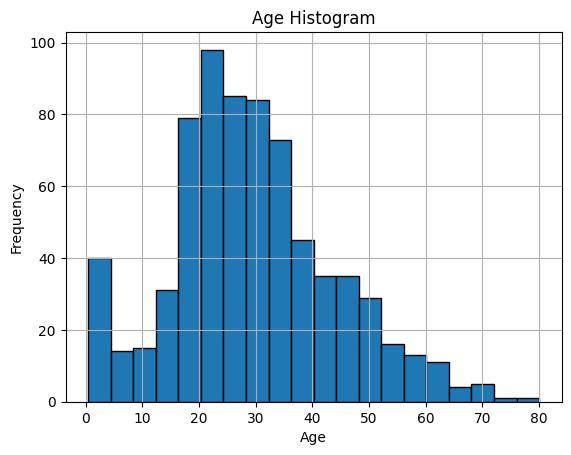

In [29]:
#3rd method: Histograms
train_df["Age"].hist(bins=20, edgecolor="black")
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

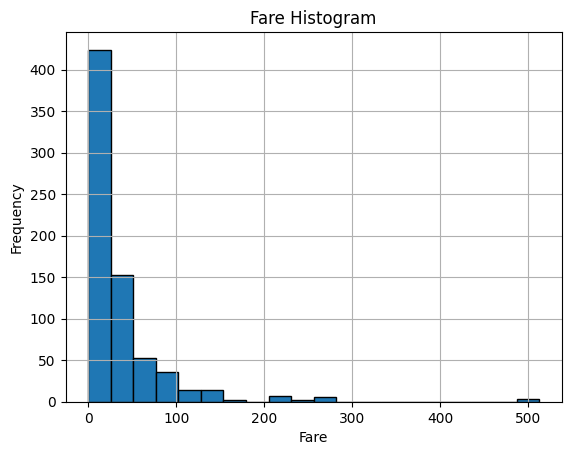

In [30]:
train_df["Fare"].hist(bins=20, edgecolor="black")
plt.title("Fare Histogram")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

Histograms for "Age" & "Fare" gives almost the same observation as boxplots for "Age" & "Fare".

In [31]:
#4th method: IQR (Interquartile Range)
q1 = train_df["Age"].quantile(0.25)
q3 = train_df["Age"].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

train_df["iqrOutliers_Age"] = (train_df["Age"] < lower) | (train_df["Age"] > upper)

In [32]:
train_df["iqrOutliers_Age"].value_counts()

iqrOutliers_Age
False    703
True      11
Name: count, dtype: int64

In [33]:
Q1 = train_df["Fare"].quantile(0.25)
Q3 = train_df["Fare"].quantile(0.75)
IQR = Q3 - Q1

LOWER = Q1 - 1.5 * IQR
UPPER = Q3 + 1.5 * IQR
train_df["iqrOutliers_Fare"] = (train_df["Fare"] < LOWER) | (train_df["Fare"] > UPPER)
train_df[:1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,iqrOutliers_Age,iqrOutliers_Fare
0,0,3,male,22.0,1,0,A/5 21171,7.25,B96 B98,S,False,False


In [34]:
train_df["iqrOutliers_Fare"].value_counts()

iqrOutliers_Fare
False    620
True      94
Name: count, dtype: int64

Lets explore some more methods for dealing with outliers. Just doing it for more exploration.

In [35]:
#5th method: Winsorizing: Replace outliers with the nearest non-outlier value within a certain percentile range.
lower = 0.05
upper = 0.95

lower_b = train_df["Age"].quantile(lower)
upper_b = train_df["Age"].quantile(upper)

train_df["Winsorized_Age"] = train_df["Age"].clip(lower=lower_b, upper=upper_b)
train_df["Winsorized_Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Winsorized_Age, Length: 714, dtype: float64

In [36]:
train_df["Age"].quantile(0.05)

4.0

In [37]:
train_df["Age"].quantile(0.95)

56.0

So, "Age" values below 5th percentile (4) are replaced with 4 & values above 95th percentile (56) are replaced with 56. A new column "Winsorized_Age" is made without outliers.

Winsorizing & Capping (Set a max and min value for the data. Any values beyond these limits are replaced with the cap values) involves same method.

In [38]:
#6th method: Log Transformation: Applying a log transformation can reduce the impact of outliers by compressing the range of data.
# Before applying log transformation, we have to ensure that there is no 0 or negative values in our column, because log of 0 & negative values isn't defined. If there are 0 values, you can add 1 to whole column but this method won't work for negative values.
train_df[train_df["Age"]==0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,iqrOutliers_Age,iqrOutliers_Fare,Winsorized_Age


We don't have 0 in our "Age" column & age can't be negative. So we can apply log transformation.

In [39]:
train_df["Log_Age"] = np.log(train_df["Age"])

"Log_Age" contains log values of corresponding "Age" values. Log transformation is mostly used for reducing skewness, improving linearity or model performance, stabilizing variance.

In [40]:
#7th method: Square Root Transformation
train_df["Square_Age"] = np.sqrt(train_df["Age"])
train_df[:1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,iqrOutliers_Age,iqrOutliers_Fare,Winsorized_Age,Log_Age,Square_Age
0,0,3,male,22.0,1,0,A/5 21171,7.25,B96 B98,S,False,False,22.0,3.091042,4.690416


"Square_Age" contains square root values of "Age". Square root transformation is used for reducing positive skewness & stabilizing variance.

In [41]:
#8th method: Cube Root Transformation
train_df["Cube_Age"] = np.cbrt(train_df["Age"])
train_df[:1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,iqrOutliers_Age,iqrOutliers_Fare,Winsorized_Age,Log_Age,Square_Age,Cube_Age
0,0,3,male,22.0,1,0,A/5 21171,7.25,B96 B98,S,False,False,22.0,3.091042,4.690416,2.802039


In [42]:
# Use Robust Statistical Models:
# Robust Regression: Certain regression models are less sensitive to outliers, such as Ridge Regression or Huber Regression.
# Tree-based Models: Decision trees, Random Forests, and Gradient Boosting models are typically robust to outliers as they partition data rather than rely on linear assumptions.

# Create a Separate Category:
# Binning: In cases where outliers represent a meaningful separate category (e.g., very high-income groups), you can categorize them into a separate bin.

In [43]:
# We can remove all the new columns now.
train_df = train_df.drop(columns=["iqrOutliers_Age", "iqrOutliers_Fare", "Winsorized_Age", "Log_Age", "Square_Age", "Cube_Age"])

## ii) Removing Outliers

We found the outliers by various methods, now its time to remove them, we will discuss the Z-Score method here.

Lets remove the "Age" outliers first.

In [44]:
#1.1 method: Z-Score by Mean
mean_age = train_df["Age"].mean()
std_age = train_df["Age"].std()

Z_Score_Age = (train_df["Age"] - mean_age)/std_age

thresh = 3

train_df["Outliers_Age"] = np.abs(Z_Score_Age) > thresh
train_df[:1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Outliers_Age
0,0,3,male,22.0,1,0,A/5 21171,7.25,B96 B98,S,False


In [45]:
train_df["Outliers_Age"].value_counts()

Outliers_Age
False    712
True       2
Name: count, dtype: int64

We are finding outliers on the basis of z-score & z-score is calculated by mean, but mean is already in error if outliers are present in the dataset. So we will calculate z-score by median.

In [46]:
# We won't prefer this method, so we can drop "Outliers_Age" column
train_df = train_df.drop(columns=["Outliers_Age"])

In [47]:
#1.2 method: Z-Score by Median
median_age = train_df["Age"].median()
mad_age = (np.abs(train_df["Age"] - median_age)).median()

Z_Score_mad_Age = (train_df["Age"] - median_age)/mad_age

thresh=3

train_df["Outliers_mad_Age"] = np.abs(Z_Score_mad_Age) > thresh
train_df[:1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Outliers_mad_Age
0,0,3,male,22.0,1,0,A/5 21171,7.25,B96 B98,S,False


In [48]:
train_df["Outliers_mad_Age"].value_counts()

Outliers_mad_Age
False    667
True      47
Name: count, dtype: int64

As we can see, there are 47 outliers in "Age" when we calculate Z-Score by median.

In [49]:
# We'll drop the rows where "Outliers_mad_Age" is True for "Age".
train_df_cleaned = train_df[~train_df["Outliers_mad_Age"]] # "~" filters out False values
train_df_cleaned.shape

(667, 11)

Now, we will calculate outliers in "Fare" with help of Z-Score by median.

In [50]:
median_fare = train_df_cleaned["Fare"].median()
mad_fare = (np.abs(train_df_cleaned["Fare"] - median_fare)).median()

Z_Score_mad_Fare = (train_df_cleaned["Fare"] - median_fare)/median_fare

thresh = 3

train_df_cleaned.loc[:, "Outliers_mad_Fare"] = np.abs(Z_Score_mad_Fare) > thresh

/tmp/ipykernel_33/1629465661.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_cleaned.loc[:, "Outliers_mad_Fare"] = np.abs(Z_Score_mad_Fare) > thresh


In [51]:
train_df_cleaned["Outliers_mad_Fare"].value_counts()

Outliers_mad_Fare
False    571
True      96
Name: count, dtype: int64

In [52]:
# We'll drop the rows where "Outliers_mad_Fare" is True for "Fare".
train_df_final = train_df_cleaned[~train_df_cleaned["Outliers_mad_Fare"]]
train_df_final.shape

(571, 12)

In [53]:
# Now we have dropped outliers we can remove the columns of outliers
train_df1 = train_df_final.drop(columns=["Outliers_mad_Age", "Outliers_mad_Fare"])
train_df1[:1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.25,B96 B98,S


# 3. Data Visualization

Categorical Variable -> Sex, Ticket, Cabin, Embarked. All others are numerical variables.

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'notebook'

- Histograms - Continuous numerical data.
- Countplot - Categorical or discrete data.

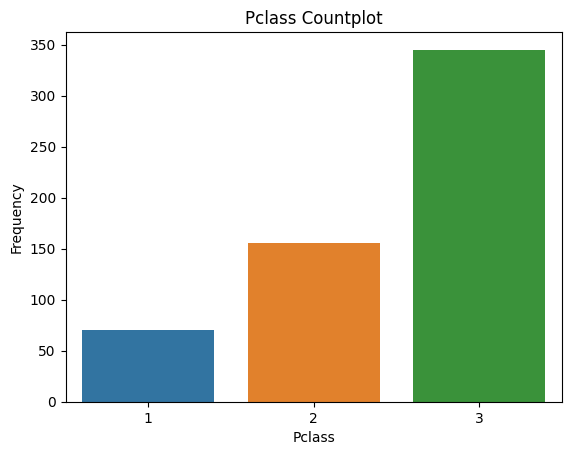

In [55]:
sns.countplot(x="Pclass", data=train_df1)
plt.title("Pclass Countplot")
plt.xlabel("Pclass")
plt.ylabel("Frequency")
plt.show()

Approximation: 
- Pclass=1, People around 75
- Pclass=2, People around 150
- Pclass=3, People around 350

- So most of the people had 3rd ticket class, then 2nd & then 1st.

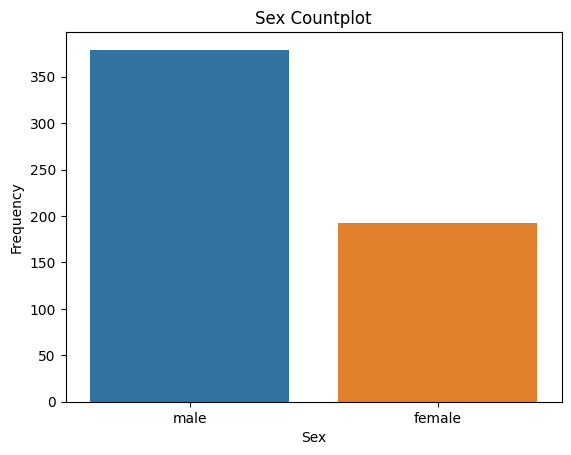

In [56]:
sns.countplot(x="Sex", data=train_df1)
plt.title("Sex Countplot")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.show()

Approximation:
- Male: 375
- Female: 200

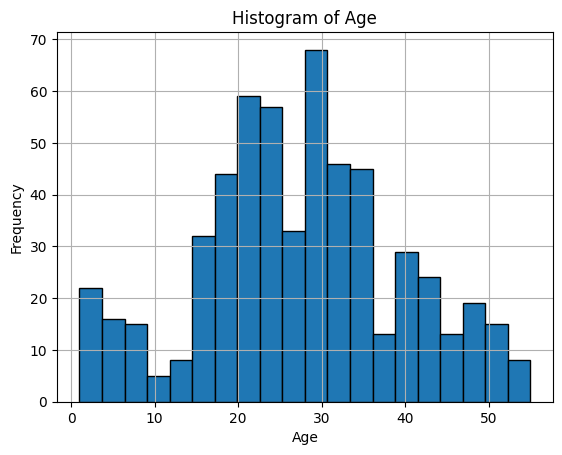

In [57]:
train_df1["Age"].hist(bins=20, edgecolor="black")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

As we have already dealt with outliers, the skewness of "Age" histogram is gone.

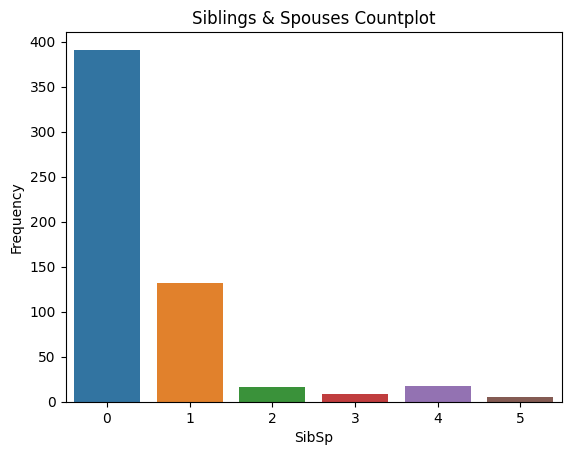

In [58]:
sns.countplot(x="SibSp", data=train_df1)
plt.title("Siblings & Spouses Countplot")
plt.xlabel("SibSp")
plt.ylabel("Frequency")
plt.show()

Approximation:
- Around 400 people have 0 siblings or spouses.
- Around 125 people have 1 siblings or spouses.

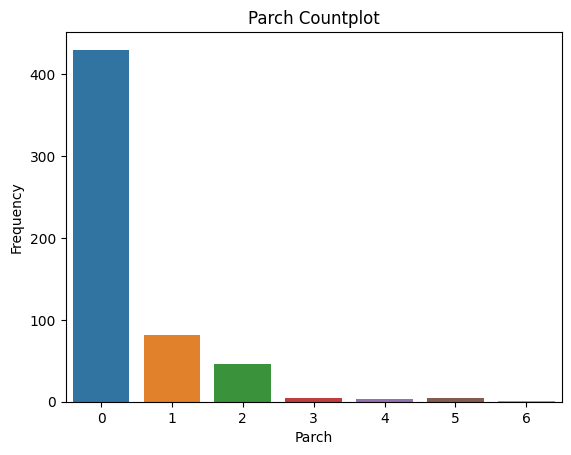

In [59]:
sns.countplot(x="Parch", data=train_df1)
plt.title("Parch Countplot")
plt.xlabel("Parch")
plt.ylabel("Frequency")
plt.show()

Approx:
- Around 425 people have no parents or childrens.
- Around 75 people have 1 parents or childrens.
- Around 50 people have 2 parents or childrens.

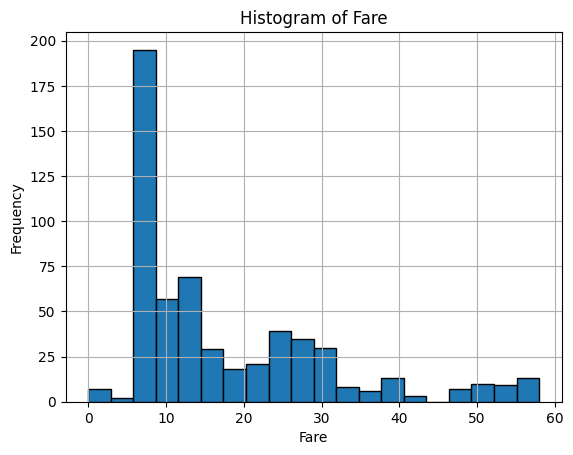

In [60]:
train_df1["Fare"].hist(bins=20, edgecolor="black")
plt.title("Histogram of Fare")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

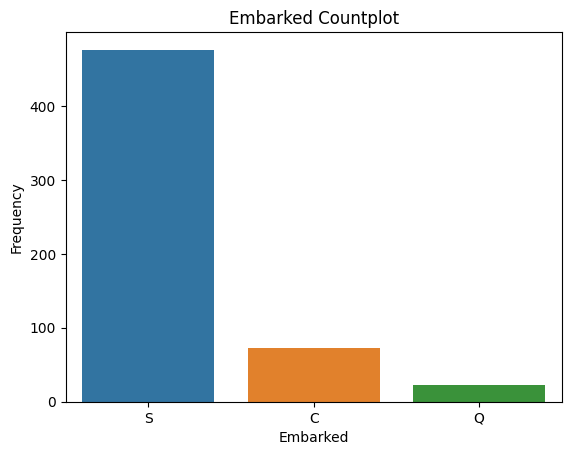

In [61]:
sns.countplot(x="Embarked", data=train_df1)
plt.title("Embarked Countplot")
plt.xlabel("Embarked")
plt.ylabel("Frequency")
plt.show()

Approx:
- Around 450 people were embarked for "S".
- Around 50 people were embarked for "C".
- Around 10 people were embarked for "Q".

Pie plots are used when there is limited number of categories (usually less than 6-8).

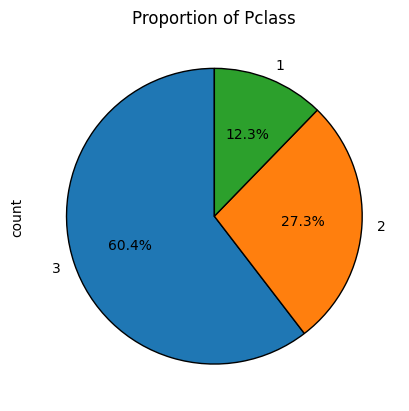

In [62]:
train_df1["Pclass"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, wedgeprops={"edgecolor": "black"})
plt.title('Proportion of Pclass')
plt.show()

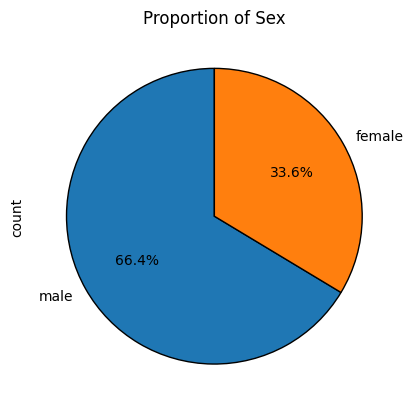

In [63]:
train_df1["Sex"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Proportion of Sex")
plt.show()

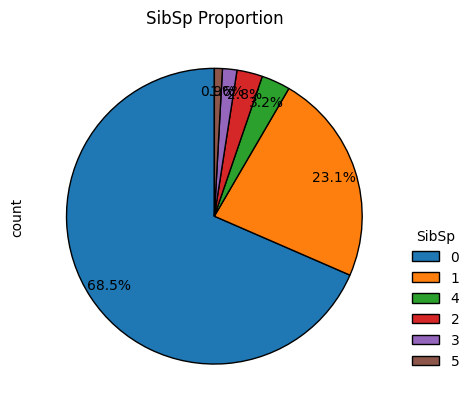

In [64]:
pie_plot = train_df1["SibSp"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, pctdistance=0.85, wedgeprops={'edgecolor': 'black'}, labels=None)

plt.legend(labels=train_df1["SibSp"].value_counts().index, title="SibSp", loc="best", bbox_to_anchor=(1, 0.5),  frameon=False)
plt.title("SibSp Proportion")
plt.show()

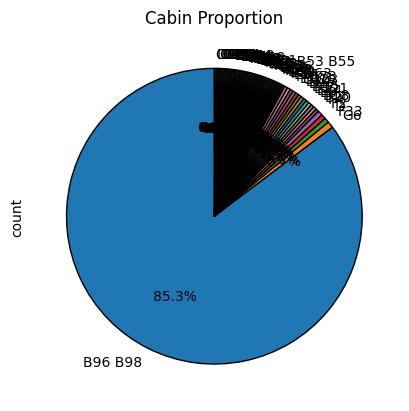

In [65]:
train_df1["Cabin"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Cabin Proportion")
plt.show()

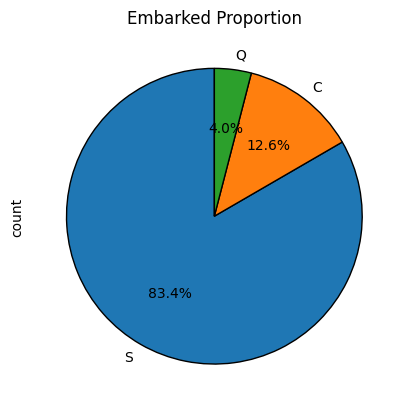

In [66]:
train_df1["Embarked"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Embarked Proportion")
plt.show()

Heatmaps: Visualize correlations between numerical variables.


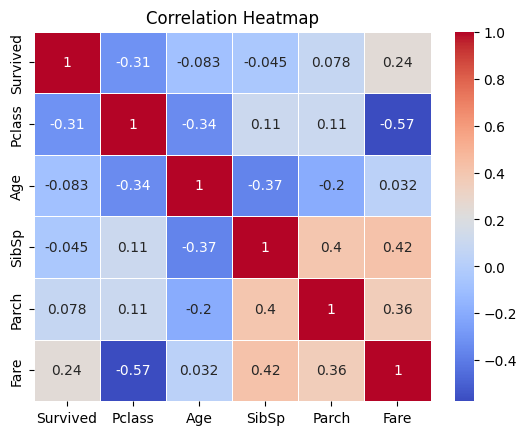

In [67]:
num_df = train_df1.select_dtypes(include=[float, int])
corr_matrix = num_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Pair Plots: Visualize pairwise relationships in the dataset.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

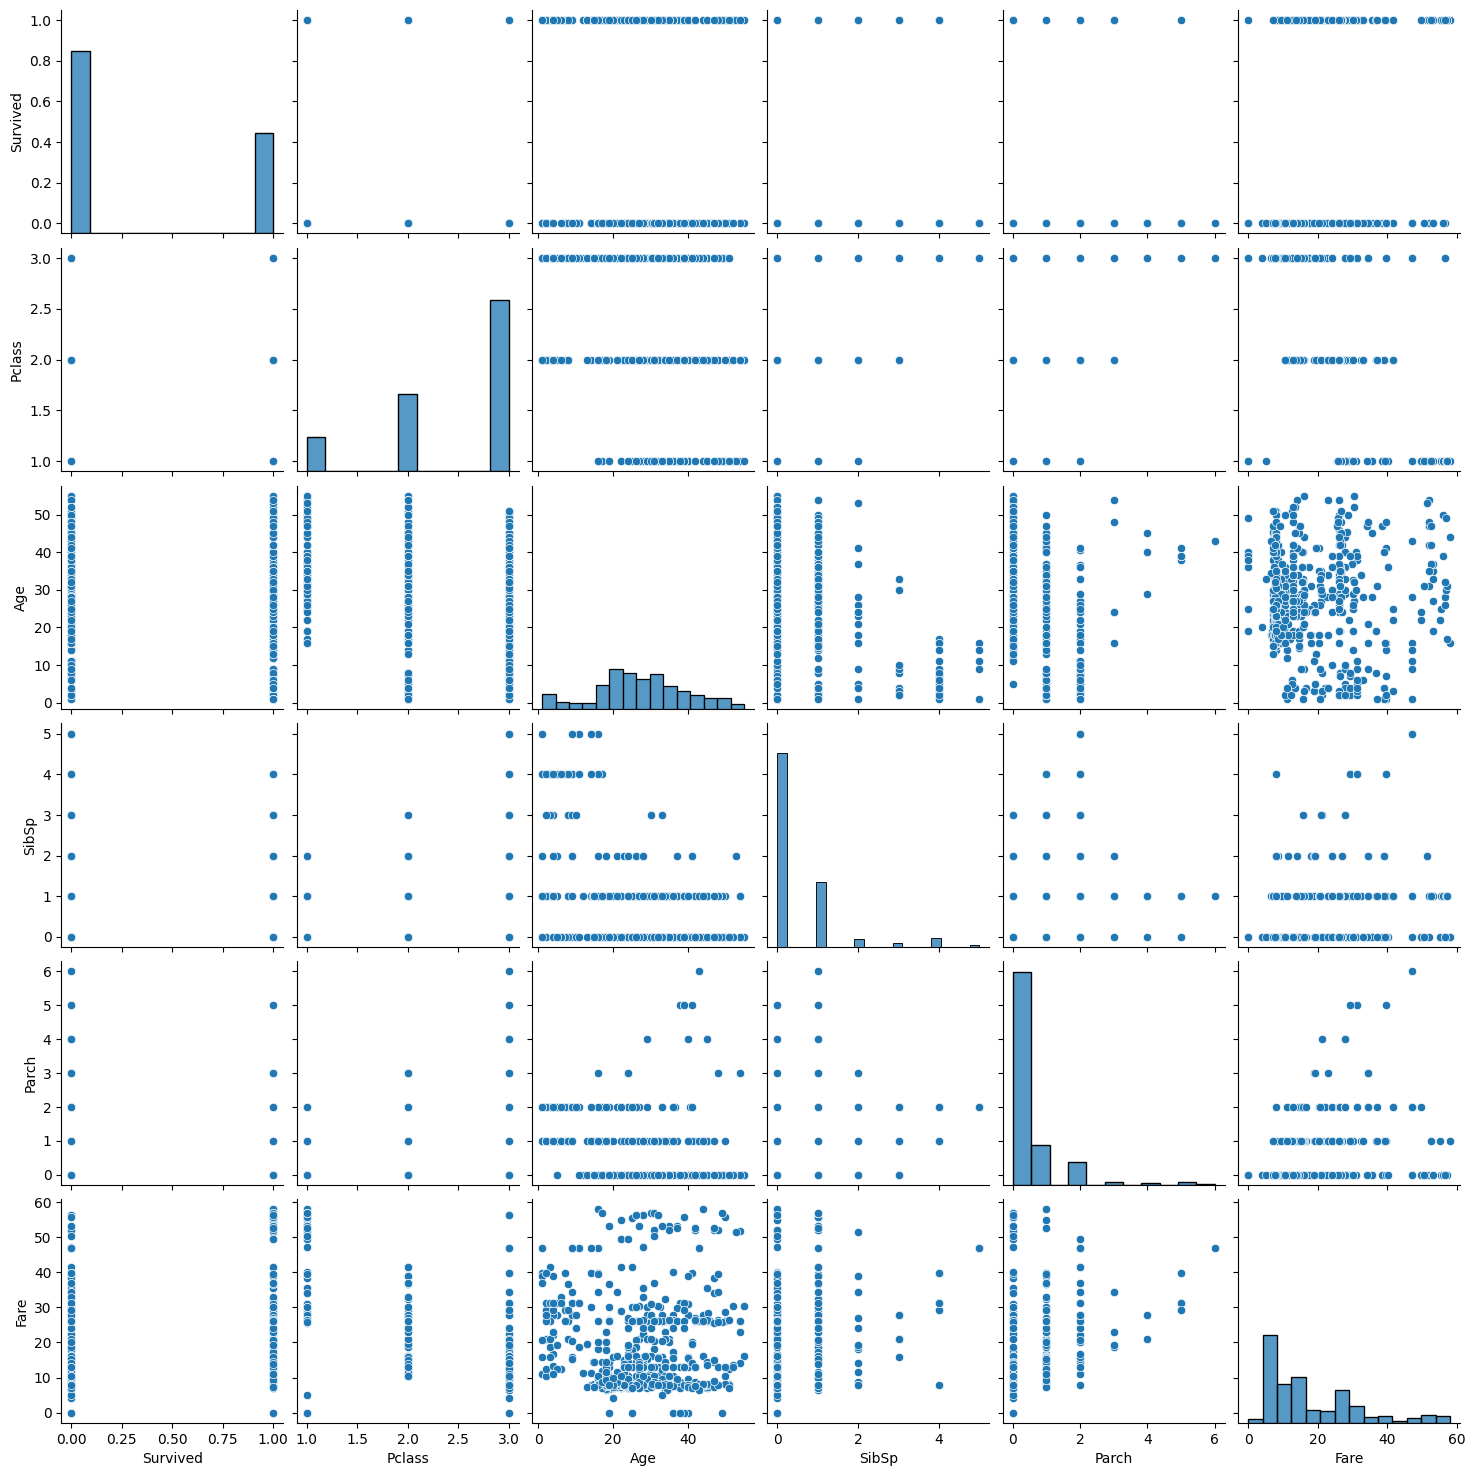

In [ ]:
sns.pairplot(train_df1)
plt.show()

In [99]:
# 5. Visualize Relationships Between Variables
# Scatter Plots: Explore the relationship between two numerical variables.
# sns.scatterplot(x='column1', y='column2', data=train_df)
# plt.title('Scatter Plot of column1 vs column2')
# plt.show()

# Violin Plots: Similar to boxplots but also show the distribution density.
# sns.violinplot(x='categorical_column', y='numerical_column', data=train_df)
# plt.title('Violin Plot of numerical_column by categorical_column')
# plt.show()

# Facet Grids: Visualize complex relationships by grouping data.
# g = sns.FacetGrid(train_df, col='categorical_column')
# g.map(plt.hist, 'numerical_column')
# plt.show()

# 9. Interactive Visualizations
# If you want to create interactive plots, you can use libraries like Plotly or Bokeh:
# import plotly.express as px
# fig = px.scatter(train_df, x='column1', y='column2', color='categorical_column')
# fig.show()

# 4. Some steps before modeling

We have dealt with null values & outliers & did visualization of the dataset. Lets do some necessary steps before we make prediction model.

## 1. Label Encoding & One-hot Encoding

Convert categorical features like Sex, Ticket, Cabin, Embarked into numerical format.

In [100]:
from sklearn.preprocessing import LabelEncoder as LE

In [101]:
le = LE()
train_df1["Sex"] = le.fit_transform(train_df1["Sex"])

In [102]:
train_df1[:2]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,0.388889,1,0,0.125045,False,True
2,1,3,0,0.462963,0,0,0.136687,False,True


"Sex" column has been label encoded with male=1 & female=0.

In [103]:
train_df1 = pd.get_dummies(train_df1, columns=["Embarked"], drop_first=True)

KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

In [ ]:
train_df1[:2]

We created dummy values for "Embarked", both "Embarked_Q" & "Embarked_S" are false, it means "Embarked_C" is true.

In [ ]:
# Deal with ticket & cabin

In [ ]:
train_df1 = train_df1.drop(columns=["Ticket", "Cabin"], axis=1)

In [ ]:
train_df1[:2]

## 2. Normalize/Scale Numerical Features

Scale numerical features in a dataset to a similar scale.

In [ ]:
# from sklearn.preprocessing import StandardScaler as SS

In [ ]:
# ss = SS()
# train_df1[["Age", "Fare"]] = ss.fit_transform(train_df1[["Age", "Fare"]])

In [ ]:
# train_df1[:2]

Above method uses StandardScaler for scaling numerical features, sometimes it can convert values to negative, the only problem here is, we can't apply log transformation to negative values. So, we'll use another method for scaling know as MinMaxScaler, which keeps the values between 0 to 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler as mms
s = mms()
train_df1[["Age", "Fare"]] = s.fit_transform(train_df1[["Age", "Fare"]])

In [ ]:
train_df1[:2]

## 3. Handle Skewness

Skewness is a measure of asymmetry or distortion of symmetric distribution.

We will apply log transformation to deal with skewness.

In [ ]:
# Before we apply log transformation, lets check if our columns have 0 values in them, because log(0) isn't defined.
train_df2 = train_df1[~((train_df1["Age"] == 0) | (train_df1["Fare"] == 0))]

In [ ]:
train_df2[["Log_Age", "Log_Fare"]] = np.log(train_df2[["Age", "Fare"]])

In [ ]:
train_df2[:2]

## 4. Feature Selection

Identify the most important features for your model. You can use techniques like correlation analysis, feature importance from tree-based models or Recursive Feature Elimination (RFE).

We have already used correlation analysis in data visualization part.

In [ ]:
# Feature importance from tree-based models.
from sklearn.ensemble import RandomForestClassifier as rfc

X = train_df2.drop('Survived', axis=1)
y = train_df2['Survived']

model = rfc()
model.fit(X, y)

features = X.columns
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

- Sex (0.223896) --> Importance Score: 22.3%, similarly for others.

In [ ]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression as lr

model = lr(max_iter=1000)

rfe = RFE(model, n_features_to_select=5)

rfe = rfe.fit(X, y)

ranking = rfe.ranking_

feature_ranking_df = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})
feature_ranking_df = feature_ranking_df.sort_values(by='Ranking')
feature_ranking_df

Rank 1 features indicates that its very important for the model. It suggests that it significantly affects the survival prediction. Importance decreases with increase in rank.

In [ ]:
# We'll keep only high importance & low ranking features.
train_df3 = train_df2[["Survived", "Sex", "Fare", "Log_Age", "Pclass", "SibSp"]]
train_df3[:1]

# 5. Modeling the dataset

## 1. Split the data

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
# We'll use the Train-Test split method
X = train_df3.drop("Survived", axis=1)
y = train_df3["Survived"]

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=1, stratify=y)

If your target variable is imbalanced, use StratifiedKFold or the stratify parameter in train_test_split to maintain the proportion of each class in both training and testing sets.

Some other ways to split the data:
- K-Fold Cross-Validation: More robust, generalizes well.
- Stratified K-Fold: Maintains class distribution.
- Leave-One-Out Cross-Validation (LOOCV): Comprehensive but computationally expensive.
- Time Series Split: Respects temporal order.
- Train-Validation-Test Split: Allows for model tuning.
- Group K-Fold: Manages grouped data.

## 2. Model Selection

Since the goal is to predict which category (survived or not) a passenger belongs to, it is a binary classification problem.

Suitable Models for Classification:
- Logistic Regression: Best for simple, interpretable binary classification.
- Decision Trees: Useful for understanding decision rules and handling non-linear data.
- Random Forest: Great for robust classification, reducing overfitting by averaging results from multiple trees.
- Support Vector Machine (SVM): Effective when classes are clearly separable, particularly in high-dimensional spaces.
- Gradient Boosting: Excellent for improving accuracy with complex data through iterative learning.
- Neural Networks: Powerful for capturing intricate patterns in large datasets, especially when features interact in complex ways.

In [ ]:
# 1st: Logistic Regression
from sklearn.linear_model import LogisticRegression as lr

model1 = lr()
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score as asc, confusion_matrix as cm, classification_report as cr
accuracy1 = asc(y_test, y_pred1)
accuracy1

In [ ]:
conf1 = cm(y_test, y_pred1)
conf1

- True Negatives (TN), False Positives (FP)
- False Negatives (FN), True Positives (TP)

- Positive class: 1, Negative Class: 0

- True Positive (TP): The model correctly predicts the positive class (e.g., correctly predicting "Survived" when it is indeed survived).

- True Negative (TN): The model correctly predicts the negative class (e.g., correctly predicting "Not Survived" when it is indeed not survived).

- False Positive (FP): The model incorrectly predicts the positive class (e.g., predicting "Survived" when it is not survived). Aka Type I error.

- False Negative (FN): The model incorrectly predicts the negative class (e.g., predicting "Not Survived" when it is actually survived). Aka Type II error.

In [ ]:
repo1 = cr(y_test, y_pred1)
print(repo1)

- Precision: Of all the instances the model predicted as positive, how many were actually positive?

- Recall (Sensitivity): Of all the actual positive instances, how many were correctly predicted by the model?

- F1-Score: The harmonic mean of precision and recall.

- Support: The number of actual occurrences of the class in the dataset.

- Macro average: Calculates metrics for each class independently and then takes the average, treating all classes equally regardless of their support.

- Weighted average: The number of instances of each class when calculating the average metrics.

In [ ]:
from sklearn.metrics import roc_curve as rc, roc_auc_score as ras

y_prob1 = model1.predict_proba(X_test)[:, 1]
fpr, tpr, _ = rc(y_test, y_prob1)
auc = ras(y_test, y_prob1)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC1')
plt.legend(loc='lower right')
plt.show()

- True Positive Rate (TPR): The proportion of actual positive cases that were correctly predicted as positive.
- False Positive Rate (FPR): The proportion of actual negative cases that were incorrectly predicted as positive.

Interpretation of the ROC curve:
1. Diagonal line: This represents a classifier that guesses randomly. It has a TPR and FPR of 0.5.
2. Curve: The shape of the curve indicates the performance of the model.
- Closer to the top-left corner: The model has better performance, with high TPR and low FPR.
- Closer to the diagonal line: The model has worse performance, with TPR and FPR closer to 0.5.

Area Under the Curve (AUC):
- An AUC of 1 indicates perfect classification, while an AUC of 0.5 indicates random guessing.

In [ ]:
from sklearn.model_selection import GridSearchCV as gsc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler as ss

pipeline = Pipeline([
  ("scaler", ss()),
  ("logistic", lr())
])

param_grid = {
  "logistic__penalty": ["l1", "l2"],
  "logistic__C": [0.01, 0.1, 1, 10, 100],
  "logistic__solver": ["liblinear", "saga"]
}

grid_search = gsc(
  estimator=pipeline,
  param_grid=param_grid,
  cv=5,
  scoring="accuracy",
  n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best params: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [ ]:
best_model = grid_search.best_estimator_

y_predlr = best_model.predict(X_test)

accuracy = asc(y_test, y_predlr)
accuracy

In [ ]:
best_params = grid_search.best_params_

pipeline_best = Pipeline([
    ("scaler", ss()),
    ("logistic", lr(
        penalty=best_params['logistic__penalty'],
        C=best_params['logistic__C'],
        solver=best_params['logistic__solver']
    ))
])

pipeline_best.fit(X_train, y_train)

y_pred_best = pipeline_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_best)
accuracy

In [ ]:
# 2nd: Decision Trees
from sklearn.tree import DecisionTreeClassifier as dtc, plot_tree as pt

model2 = dtc(random_state=1)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

In [ ]:
accuracy2 = asc(y_test, y_pred2)
accuracy2

In [ ]:
conf2 = cm(y_test, y_pred2)
conf2

In [ ]:
repo2 = cr(y_test, y_pred2)
print(repo2)

In [ ]:
y_prob2 = model2.predict_proba(X_test)[:, 1]
fpr, tpr, _ = rc(y_test, y_prob2)
auc = ras(y_test, y_prob2)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", label=f"ROC Curve (area={auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC2")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 3rd: Random Forest
from sklearn.ensemble import RandomForestClassifier as rfc

model3 = rfc(n_estimators=100, random_state=1)
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)

In [ ]:
accuracy3 = asc(y_test, y_pred3)
accuracy3

In [ ]:
conf3 = cm(y_test, y_pred3)
conf3

In [ ]:
repo3 = cr(y_test, y_pred3)
print(repo3)

In [ ]:
y_prob3 = model3.predict_proba(X_test)[:, 1]
fpr, tpr, _ = rc(y_test, y_prob3)
auc = ras(y_test, y_prob3)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", label=f"ROC Curve (area:{auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC3")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 4th: Support Vector Machine (SVM)
from sklearn.svm import SVC

model4 = SVC(kernel="linear", probability=True)
model4.fit(X_train, y_train)

y_pred4 = model4.predict(X_test)

In [ ]:
accuracy4 = asc(y_test, y_pred4)
accuracy4

In [ ]:
conf4 = cm(y_test, y_pred4)
conf4

In [ ]:
repo4 = cr(y_test, y_pred4)
print(repo4)

In [ ]:
y_prob4 = model4.predict_proba(X_test)[:, 1]
fpr, tpr, _ = rc(y_test, y_pred4)
auc = ras(y_test, y_pred4)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", label=f"ROC Curve (area:{auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC4")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 5th: Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier as gbc

model5 = gbc()
model5.fit(X_train, y_train)

y_pred5 = model5.predict(X_test)

In [ ]:
accuracy5 = asc(y_test, y_pred5)
accuracy5

In [ ]:
conf5 = cm(y_test, y_pred5)
conf5

In [ ]:
repo5 = cr(y_test, y_pred5)
print(repo5)

In [ ]:
y_prob5 = model5.predict_proba(X_test)[:, 1]
fpr, tpr, _ = rc(y_test, y_pred5)
auc = ras(y_test, y_pred5)

plt.plot(fpr, tpr, color="darkorange", label=f"ROC Curve (area:{auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC5")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.show()

Observation after applying several models: The highest accuracy model is Gradient Boosting (83.93%).

In [ ]:
# 5. Hyperparameter Tuning (Optional)
# Why? Fine-tuning hyperparameters can significantly improve model performance.
# How? You can use techniques like Grid Search or Randomized Search.
# Libraries: GridSearchCV or RandomizedSearchCV from sklearn.model_selection.

# 6. Cross-Validation (Optional)
# Why? To validate the model's performance across different subsets of the data.
# How? Use cross_val_score or cross_validate from sklearn.model_selection.

# 8. Model Export (Optional)
# Why? If your model is performing well, you might want to save it for future use.
# How? Use joblib or pickle to save your model.
# import joblib
# joblib.dump(model, 'model.pkl')

# 9. Model Interpretation (Optional)
# Why? Understanding why your model makes certain predictions is important, especially in areas like healthcare or finance.
# How? Use techniques like SHAP or LIME for interpreting model predictions.

# 10. Deployment (Optional)
# Why? If the model is good enough, you can deploy it to make real-world predictions.
# How? This could involve integrating the model into an application or serving it via an API.